### 1.Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

import seaborn as sns

### 2.Loading Data

In [2]:
data = pd.read_csv(r'C:\Users\G.SAI KRISHNA\Desktop\ML_Projects\ML_GFG\7.Logistic Regression Classification\seed_data.csv')
data.head()

,area,perimeter,compactness,length,width,asymmetry,length_kernel_groove,kernel
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   area                  210 non-null    float64
 1   perimeter             210 non-null    float64
 2   compactness           210 non-null    float64
 3   length                210 non-null    float64
 4   width                 210 non-null    float64
 5   asymmetry             210 non-null    float64
 6   length_kernel_groove  210 non-null    float64
 7   kernel                210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [4]:
data.describe()

,area,perimeter,compactness,length,width,asymmetry,length_kernel_groove,kernel
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,1.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


In [20]:
#Counting unique values
data['kernel'].unique()

array([0, 1, 2], dtype=int64)

In [21]:
data['kernel'].value_counts()

2    70
1    70
0    70
Name: kernel, dtype: int64

### 3.Data Splitting

In [5]:
x=data.drop(['kernel'],axis=1)
y=data['kernel']

In [6]:
x.head()

,area,perimeter,compactness,length,width,asymmetry,length_kernel_groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [7]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: kernel, dtype: int64

### 4.Data Scaling

In [8]:
scaler_x = StandardScaler()
x = scaler_x.fit_transform(x)
x

array([[ 1.42097769e-01,  2.15462437e-01,  6.06017918e-05, ...,
         1.41701823e-01, -9.86151745e-01, -3.83577423e-01],
       [ 1.11880257e-02,  8.22375713e-03,  4.28515270e-01, ...,
         1.97432229e-01, -1.78816620e+00, -9.22013487e-01],
       [-1.92066576e-01, -3.60200562e-01,  1.44238325e+00, ...,
         2.08047544e-01, -6.67479334e-01, -1.18919199e+00],
       ...,
       [-5.67570840e-01, -6.90247348e-01,  7.33948301e-01, ...,
        -7.06044846e-02,  3.07658816e+00, -7.18060432e-01],
       [-1.03608992e+00, -1.03564515e+00, -8.01701104e-01, ...,
        -1.12152071e+00, -6.81351965e-02, -7.42534799e-01],
       [-8.77620233e-01, -9.35863561e-01, -1.10234659e-01, ...,
        -7.55292327e-01,  1.29122264e+00, -7.03783718e-01]])

### 5.Training & Testing Data

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [10]:
x_train.shape

(147, 7)

In [11]:
x_test.shape

(63, 7)

In [12]:
y_train.shape

(147,)

In [13]:
y_test.shape

(63,)

# <font color="green">6.Logistic Regression Classification</font>

## Training the Model

In [14]:
classifier = LogisticRegression()

classifier.fit(x_train,y_train)

LogisticRegression()

## Predicting Test Values

In [15]:
y_pred = classifier.predict(x_test)

y_pred

array([0, 1, 0, 0, 2, 1, 1, 1, 1, 2, 0, 2, 0, 2, 1, 1, 2, 0, 0, 0, 2, 0,
       0, 0, 1, 1, 1, 0, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 0, 0, 2, 0, 1, 2,
       0, 1, 1, 0, 0, 1, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1],
      dtype=int64)

## Visualizing Model Performance

In [16]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[18,  1,  0],
       [ 2, 25,  0],
       [ 0,  0, 17]], dtype=int64)

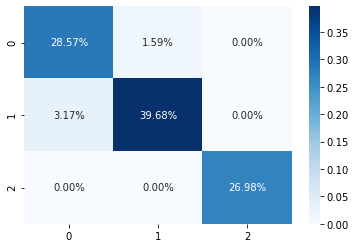

In [17]:
sns.heatmap(cm/np.sum(cm), annot=True,fmt='.2%', cmap='Blues')

In [18]:
print("Accuracy : "+str(accuracy_score(y_test,y_pred)*100)+"%")

Accuracy : 95.23809523809523%
